In [41]:
import cv2
import os
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

In [61]:
ROOT_PATH = "D:\01_BALAJI\01_MLAI\MLAI\11_ComputerVision\Assignment_2\Part2"
face_meta_data = pd.DataFrame(columns=["box_data","total_faces","image_name"])
# Load the cascade
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
file_name_list =  os.listdir("./training_images")

box_data = []
total_faces = []


for file_name in file_name_list:
    file_path = os.path.join("./training_images",file_name)
    img = cv2.imread(file_path)
    #gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(img, 1.1, 5)    
    if faces is not None:
        box_data.append(faces)
        total_faces.append(len(faces))
    else:
        box_data.append(None)
        box_data.append(0)
 


In [62]:
face_meta_data["box_data"] = box_data
face_meta_data["total_faces"] = total_faces
face_meta_data["image_name"] = file_name_list
face_meta_data.head()

,box_data,total_faces,image_name
0,"[[146, 140, 428, 428]]",1,real_00001.jpg
1,"[[80, 140, 436, 436]]",1,real_00002.jpg
2,"[[33, 121, 362, 362]]",1,real_00003.jpg
3,"[[134, 173, 356, 356]]",1,real_00004.jpg
4,(),0,real_00005.jpg


## Missed to find the face ( 5 images ) 

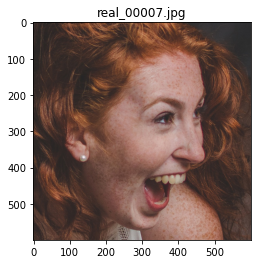

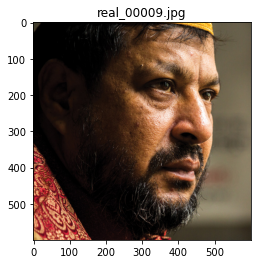

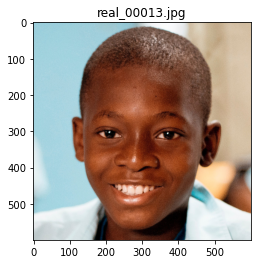

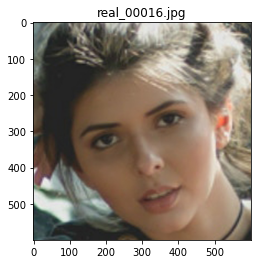

In [63]:
index = face_meta_data.query("total_faces==0").index[1:5].to_numpy()
for i in index:        
        img = cv2.imread(os.path.join("./training_images",face_meta_data.iloc[i]["image_name"]),cv2.IMREAD_COLOR)       
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.imshow(img)
        plt.title(face_meta_data.iloc[i]["image_name"])
        plt.show()

## Images with Single face ( 5 Images )

box location -- [ 80 140 436 436]


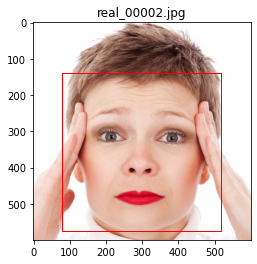

box location -- [ 33 121 362 362]


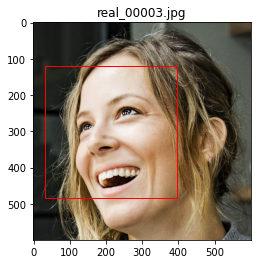

box location -- [134 173 356 356]


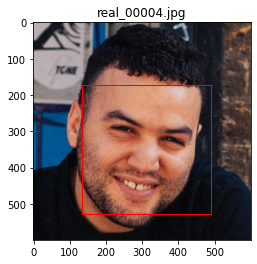

box location -- [ 61  62 472 472]


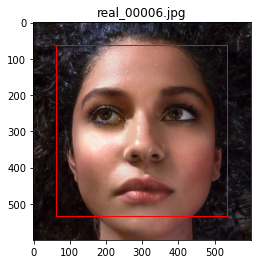

In [64]:
index = face_meta_data.query("total_faces==1").index[1:5].to_numpy()
for i in index:
        face_boundary = face_meta_data.iloc[i]["box_data"][0]
        print("box location --",face_boundary)
        fig, ax = plt.subplots()
        img = cv2.imread(os.path.join("./training_images",face_meta_data.iloc[i]["image_name"]),cv2.IMREAD_COLOR)       
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.imshow(img)
        plt.title(face_meta_data.iloc[i]["image_name"])        
        ax.add_patch(Rectangle((face_boundary[0],face_boundary[1]), face_boundary[2],face_boundary[3],fill=False,color="red"))
        plt.show()
        

## Images with more than 1 faces ( 5 Images )

Number of faces detected --  2
box location -- [[ 17  84 466 466]
 [121 358 130 130]]


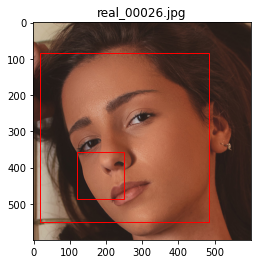

Number of faces detected --  2
box location -- [[124 105 418 418]
 [100 477  73  73]]


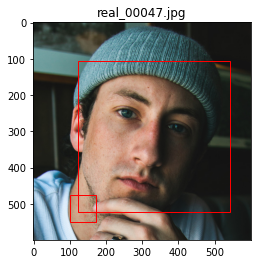

Number of faces detected --  2
box location -- [[ 92 179 383 383]
 [ 13 562  28  28]]


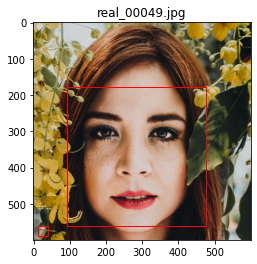

Number of faces detected --  2
box location -- [[201 301 106 106]
 [496 475  70  70]]


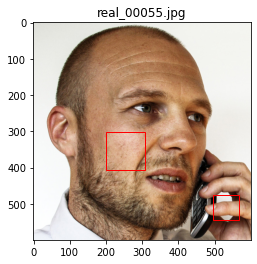

In [67]:
index = face_meta_data.query("total_faces==2").index[1:5].to_numpy()
for i in index:
        
        print("Number of faces detected -- ",face_meta_data.iloc[i]["total_faces"])
        face_boundary = face_meta_data.iloc[i]["box_data"]
        print("box location --",face_boundary)
        fig, ax = plt.subplots()
        img = cv2.imread(os.path.join("./training_images",face_meta_data.iloc[i]["image_name"]),cv2.IMREAD_COLOR)       
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.imshow(img)
        plt.title(face_meta_data.iloc[i]["image_name"])
        for boundary in face_boundary:
            ax.add_patch(Rectangle((boundary[0],boundary[1]), boundary[2],boundary[3],fill=False,color="red"))
        plt.show()